In [1]:
from cohirf.experiment.spherical_clustering_experiment import generate_spherical_clusters
import matplotlib.pyplot as plt

In [2]:
# dataset parameters
mean_r = [0.5, 1]  # Mean radii of the spheres
std = 0.01  # Standard deviation for the radii
seed_dataset = 42
features, true_labels = generate_spherical_clusters(mean_r, std, num_points_per_sphere=1000, seed=seed_dataset)

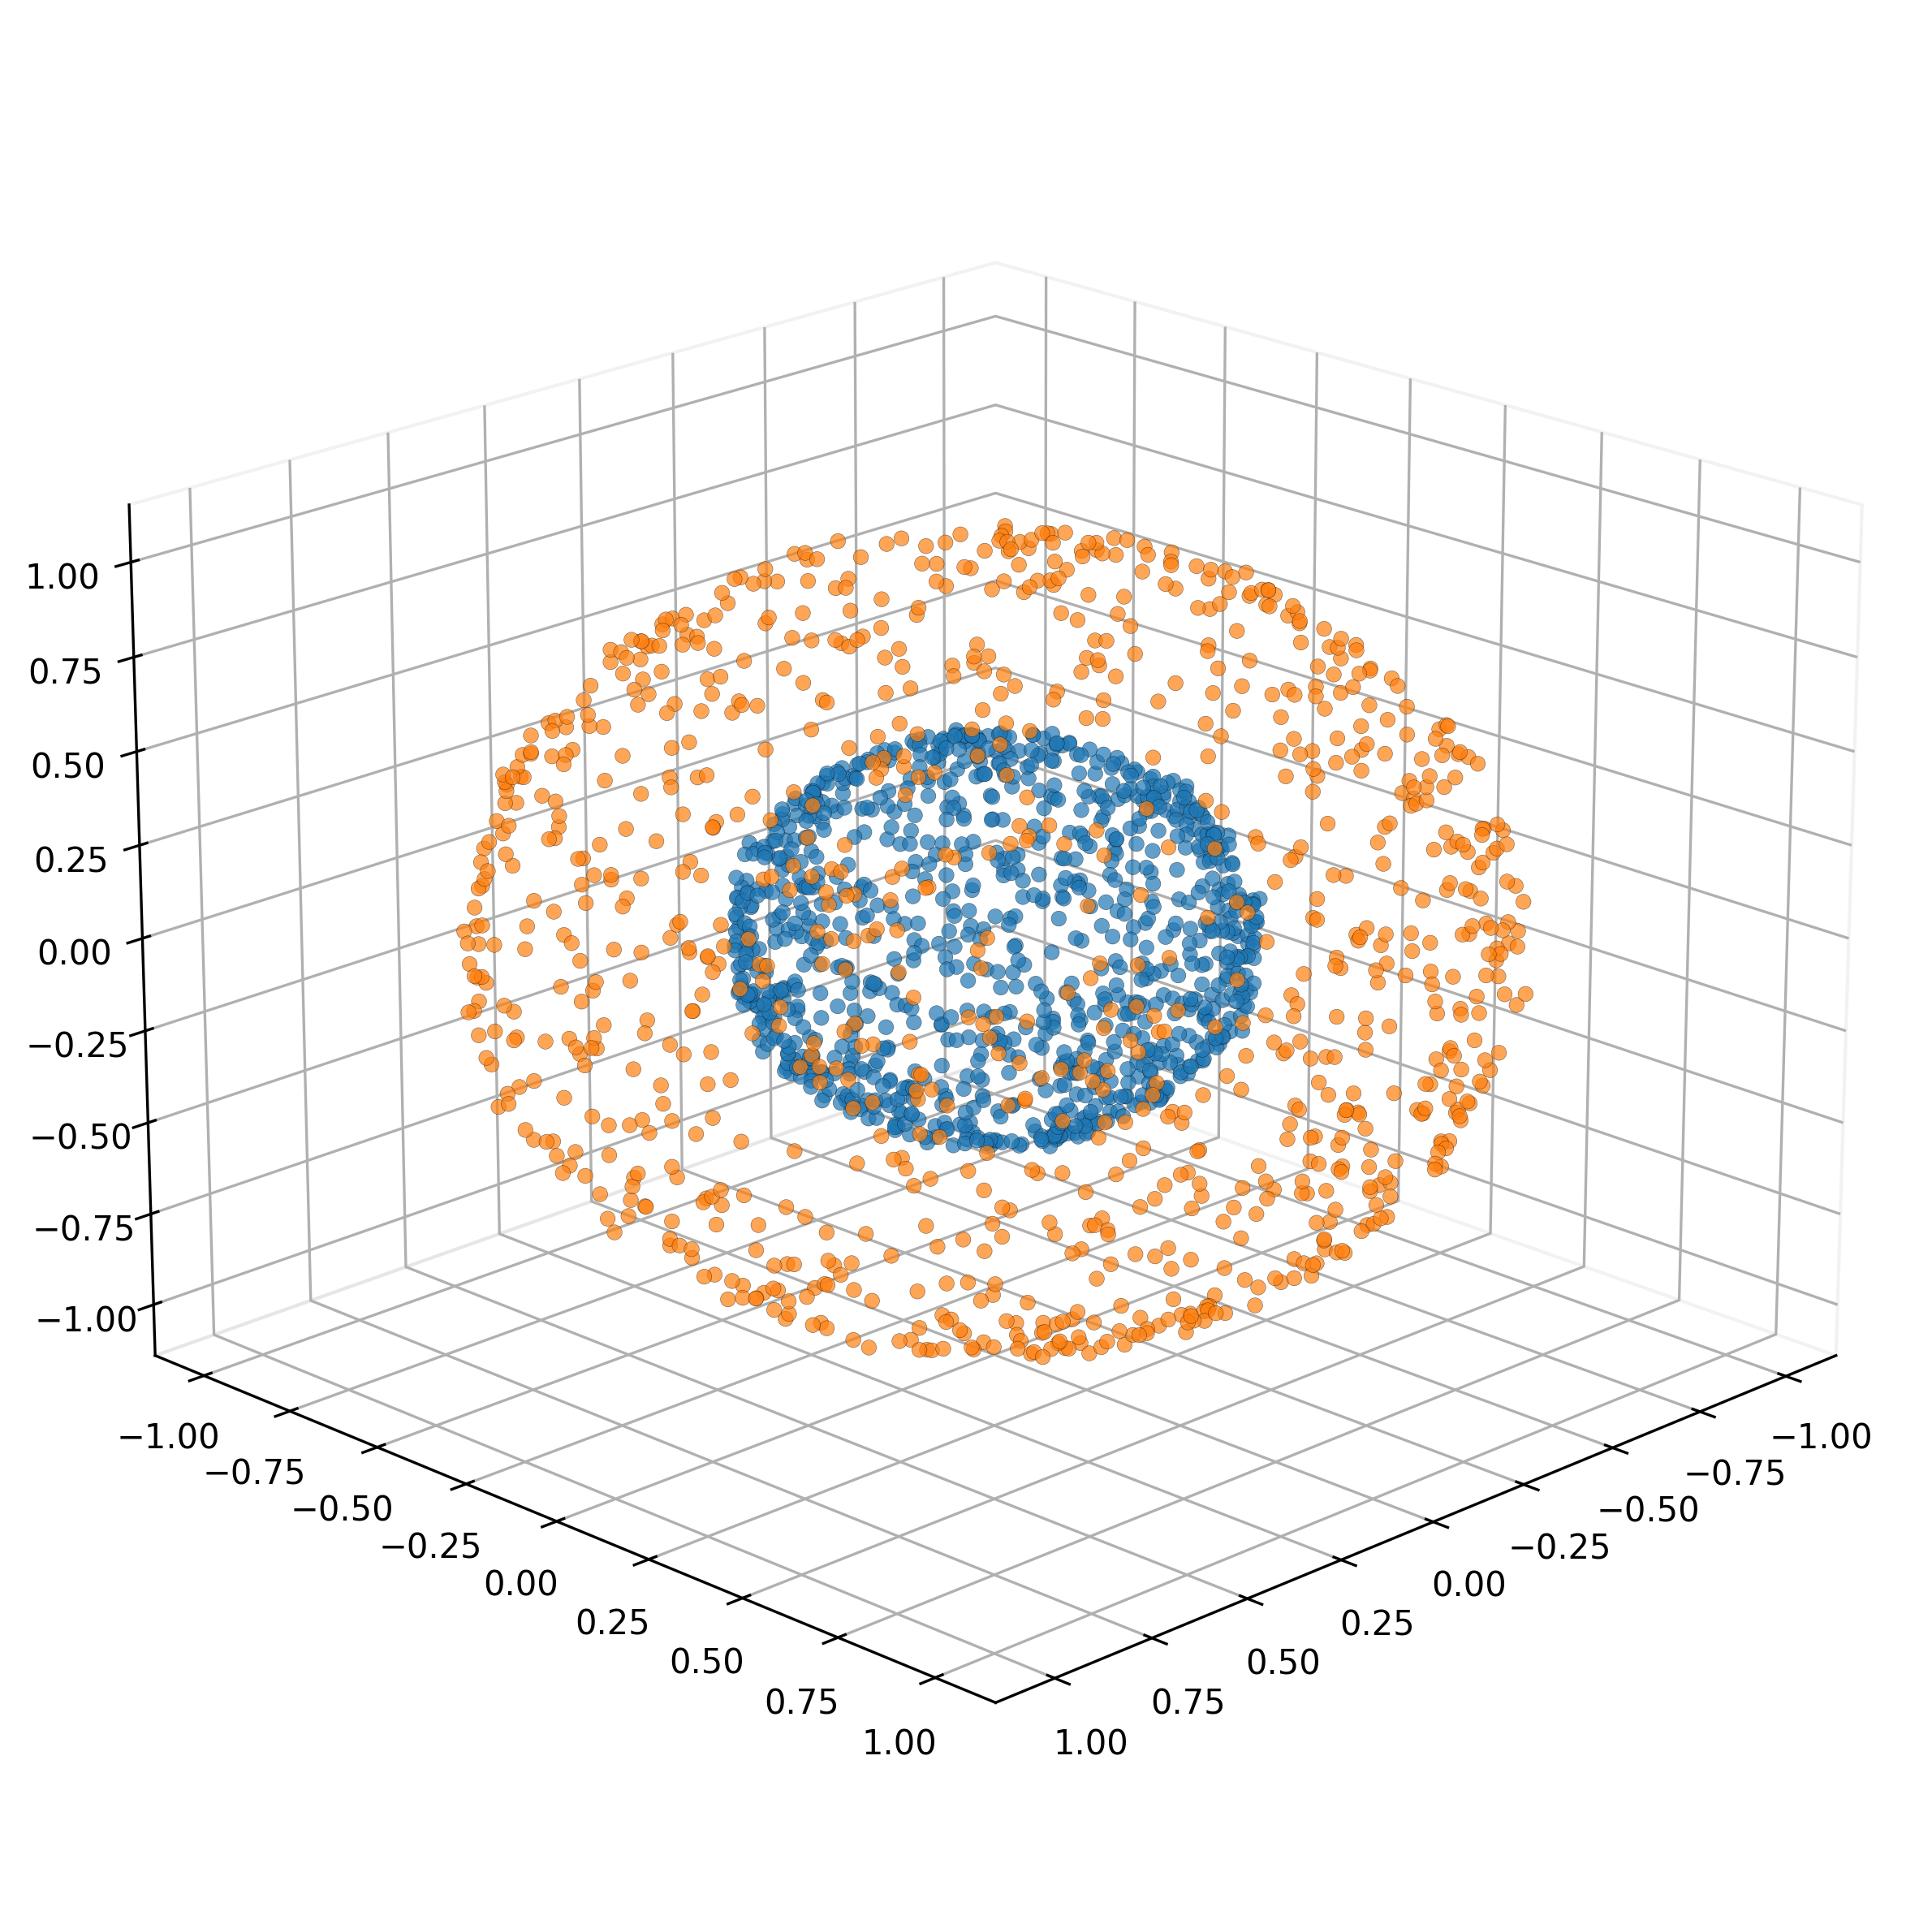

Dataset shape: (2000, 3)
Number of clusters: 2
Points per cluster: [1000, 1000]
Plots saved as 'spherical_clusters_3d.pdf' and 'spherical_clusters_3d.png'


In [6]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Set up the figure with high DPI for publication quality
fig = plt.figure(figsize=(10, 8), dpi=300)
ax = fig.add_subplot(111, projection='3d')

# Define colors for each cluster (using colorblind-friendly palette)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
cluster_labels = np.unique(true_labels)

# Plot each cluster with different colors
for i, label in enumerate(cluster_labels):
    mask = true_labels == label
    cluster_points = features[mask]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], 
              c=colors[i % len(colors)], alpha=0.7, s=20, 
              label=f'Cluster {label + 1}', edgecolors='black', linewidth=0.1)

# # Customize the plot for scientific publication
# ax.set_xlabel('X coordinate', fontsize=12, fontweight='bold')
# ax.set_ylabel('Y coordinate', fontsize=12, fontweight='bold')
# ax.set_zlabel('Z coordinate', fontsize=12, fontweight='bold')

# # Set title
# ax.set_title('3D Spherical Clustering Dataset\n(n=2000 points, 2 clusters)',
#              fontsize=14, fontweight='bold', pad=20)

# # Add legend
# ax.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98), fontsize=10)

# Set viewing angle for optimal visualization
ax.view_init(elev=20, azim=45)

# Make the plot look more professional
ax.grid(True, alpha=0.3)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Make pane edges more subtle
ax.xaxis.pane.set_edgecolor('gray')
ax.yaxis.pane.set_edgecolor('gray')
ax.zaxis.pane.set_edgecolor('gray')
ax.xaxis.pane.set_alpha(0.1)
ax.yaxis.pane.set_alpha(0.1)
ax.zaxis.pane.set_alpha(0.1)

# Tight layout for better spacing
plt.tight_layout()

# Save as PDF for publication
plt.savefig(
    "/home/belucci/code/cohirf/results/spheres/spherical_clusters_3d.pdf",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
    edgecolor="none",
    format="pdf",
)

# # Also save as PNG for preview
# plt.savefig('spherical_clusters_3d.png', dpi=300, bbox_inches='tight',
#             facecolor='white', edgecolor='none', format='png')

# Display the plot
plt.show()

print(f"Dataset shape: {features.shape}")
print(f"Number of clusters: {len(cluster_labels)}")
print(f"Points per cluster: {[np.sum(true_labels == label) for label in cluster_labels]}")
print("Plots saved as 'spherical_clusters_3d.pdf' and 'spherical_clusters_3d.png'")